# 1. Introduction


In this work, I'm going to predict the house pricing in U.S. I'm going to provide multiple solutions for this project by trying different algorithms in order to get better result. This is supervised approch, we will start from Linear regression and go to more advaced ways for instance Random Forest. This work depnds on House Sales in King County, USA. This dataset is provided by kaggle.com | https://www.kaggle.com/harlfoxem/housesalesprediction/data


# 2. Dependencies¶


In [35]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [24]:
DOWNLOAD_ROOT = 'C:\Users\\abdullahfadel\\Documents\\abdullah\\doc\Abdullah\\Master\\Master 01\\Machine Learning\\dataset\\kc_house_data.CSV'
def create_dataframe(data_path):
    df = pd.read_csv(data_path)
    return df

In [25]:
housing = create_dataframe(DOWNLOAD_ROOT)
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 3. Data exploratory¶


In [26]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


as we can see the data contains 21 columns such as date, price, floors ...etc.



lets see if we have any missing value or null



In [27]:
print(housing.isnull().any())


id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


It seems the data is almost clean no missing values



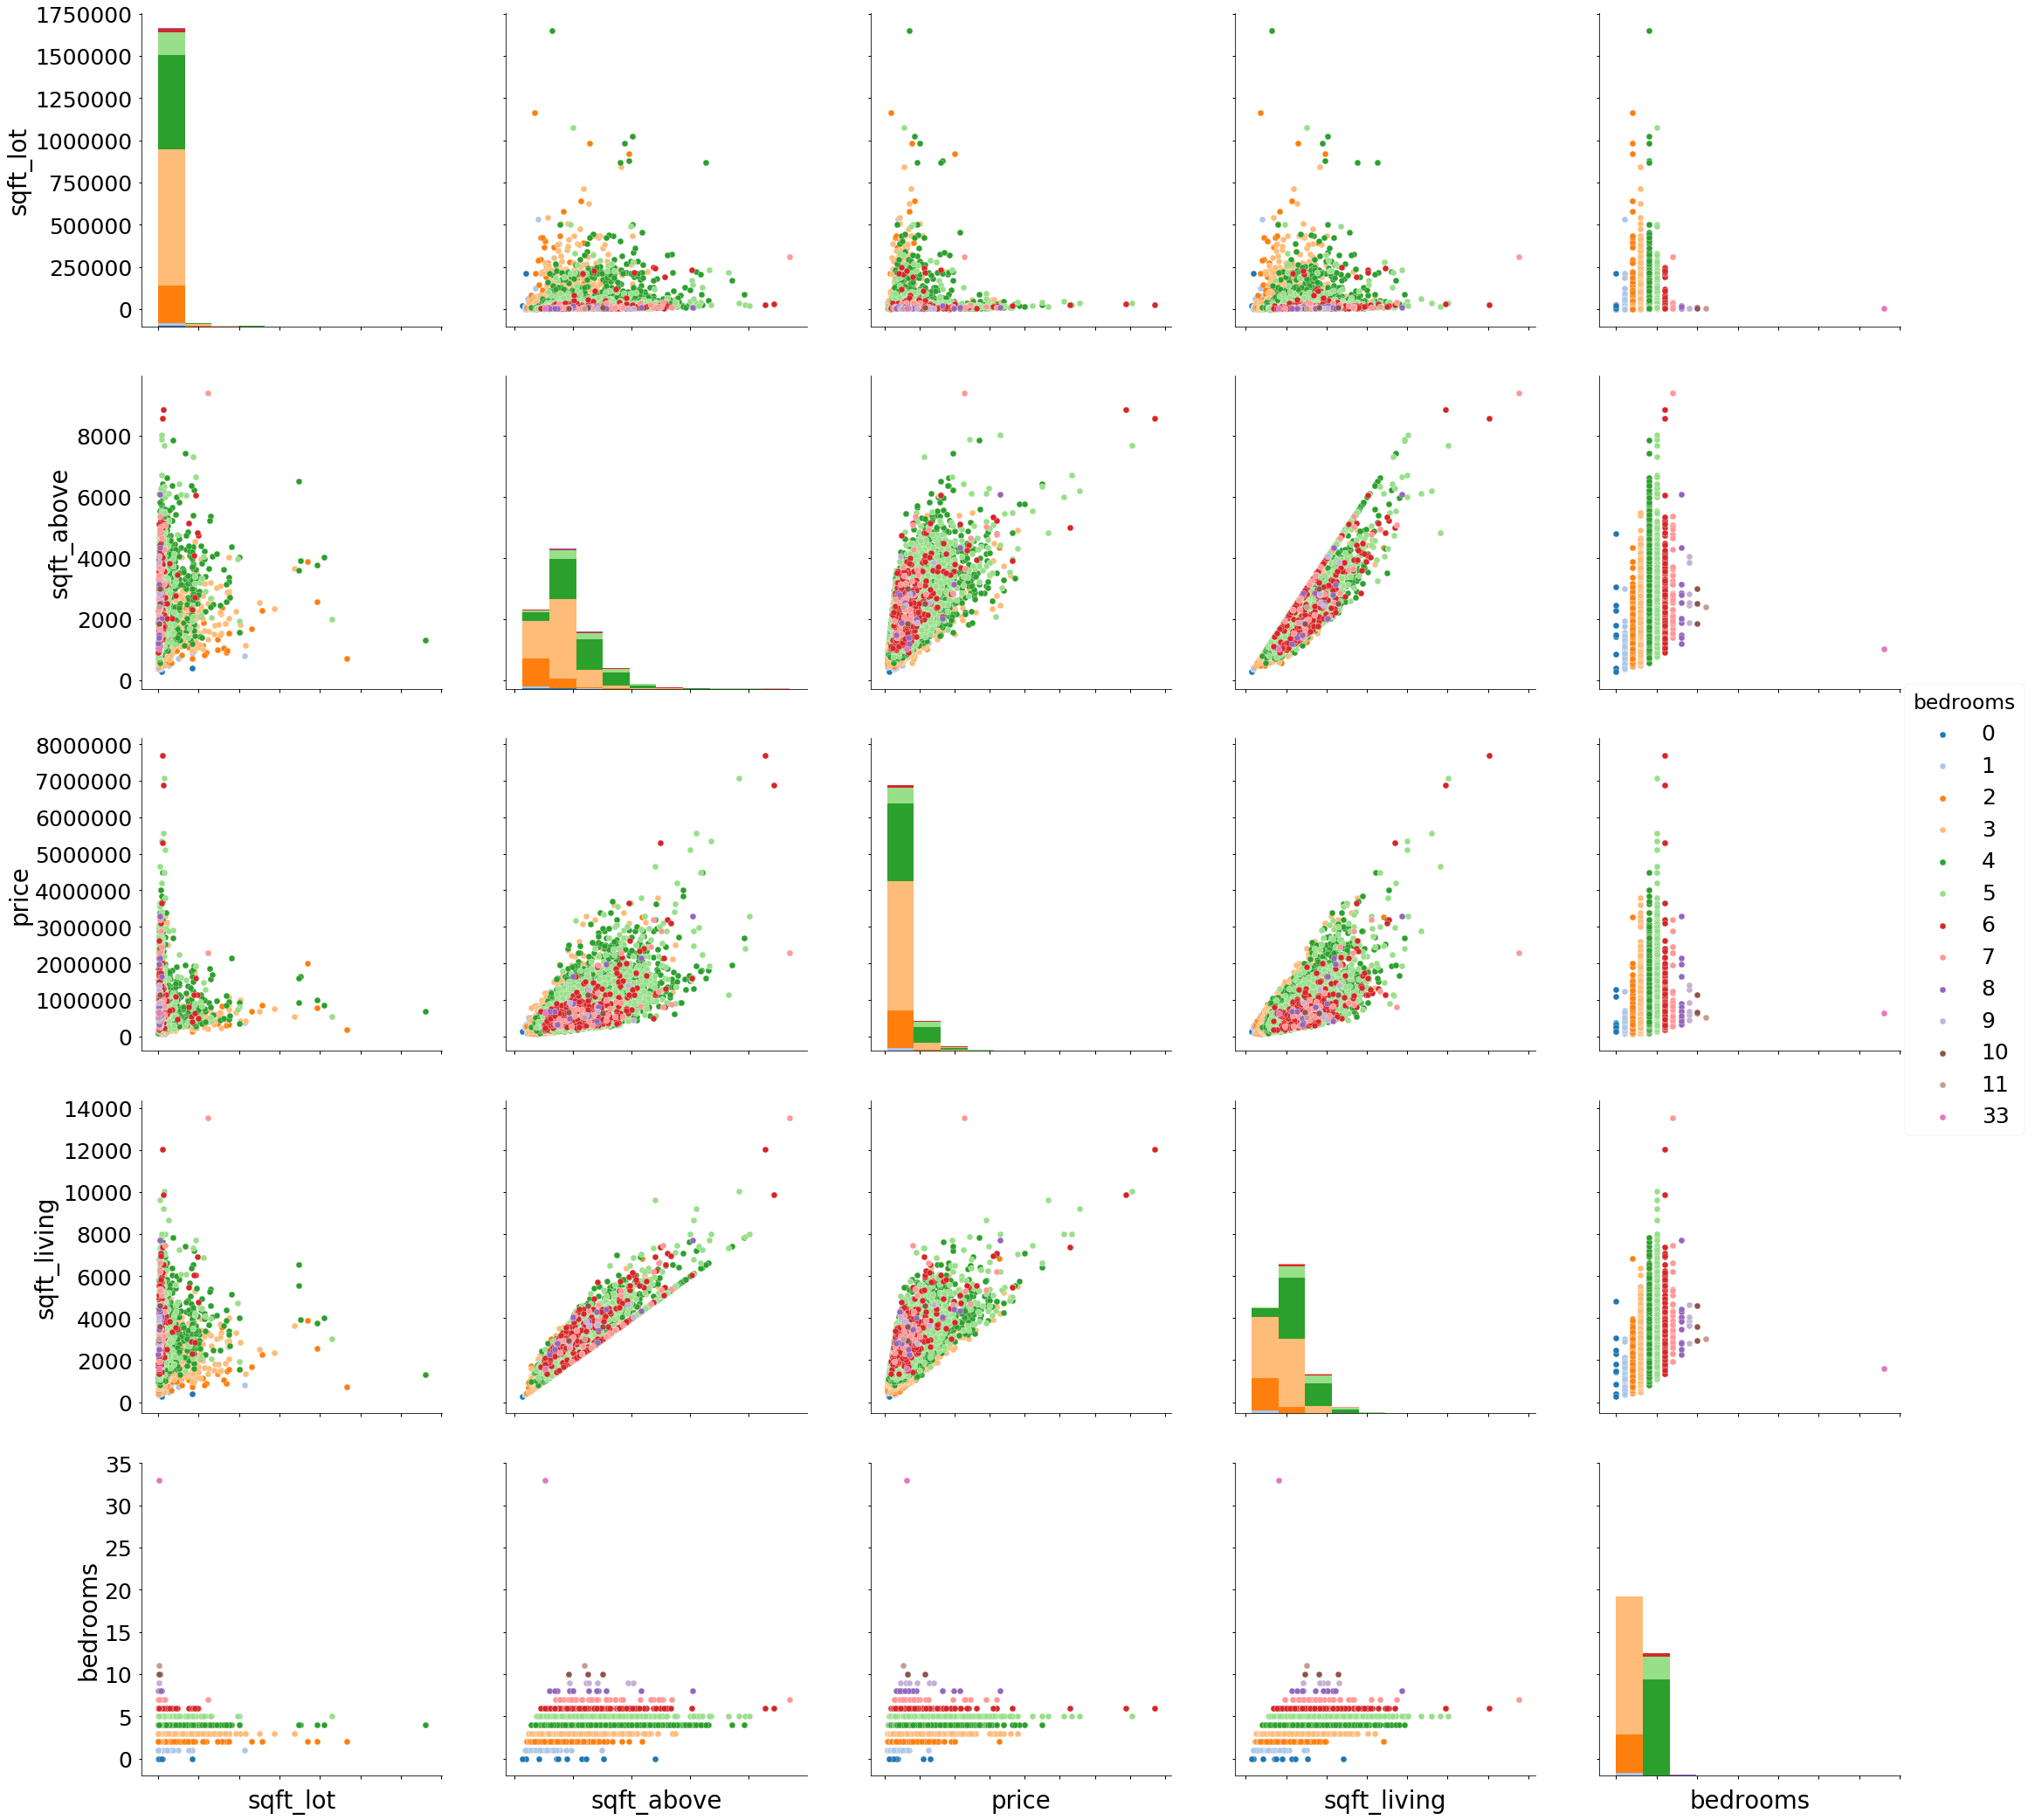

In [32]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(housing[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[])

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics(official). As we see we got some linear visulas, so I will try to use some linear model and see what I can get

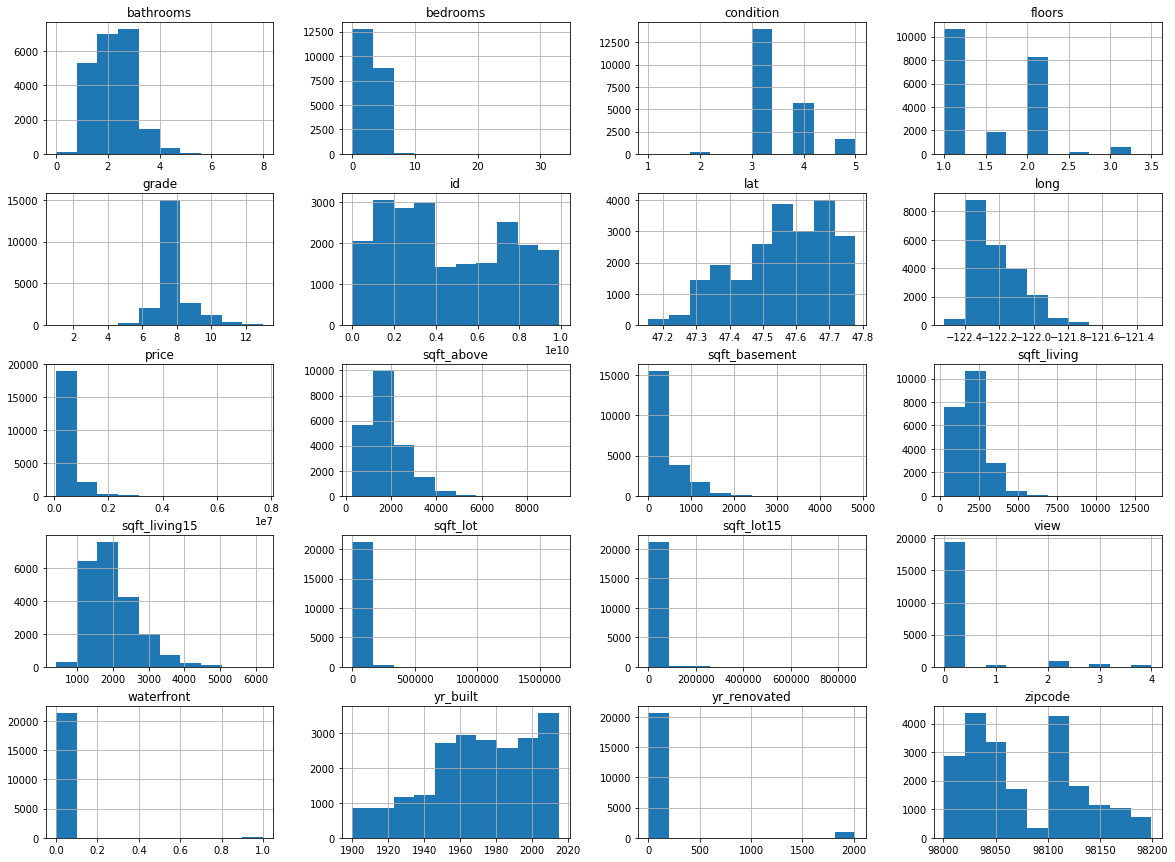

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=10, figsize=(20,15))
plt.show()

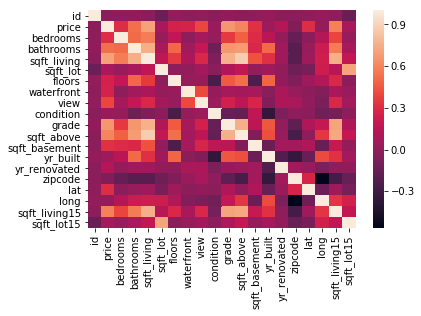

In [33]:
import seaborn as sns
corr = housing.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

As we know the correlation coefficient ranges from –1 to 1, so here we can observe that there is strong postive correlation between price and soqft_lot , between price and grade and between batheroom and soft_living. However, we can see that strong negative correlation between floors and condition. When coefficients close to zero mean that there is no linear correlation such as condition and zipcode.

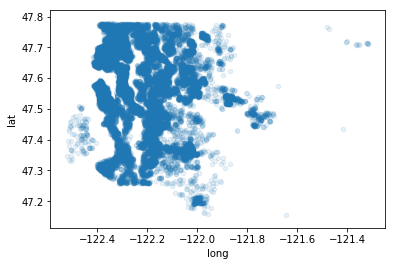

In [34]:
housing.plot(kind="scatter", x="long", y="lat",alpha=0.1)


# 6. Prepare the data

Now I'm going to split the data into train_set and test_set. I'm going to give the ratio 0.2, meaning that 80% for train_set and 20% for test_set, I will keep the test_set aside in order to test our model, but before that , lets try to scale the data as it is proofed that some algorithms perform well on scaled data. In addition, I will keep copy of data non scaled in order to try it with algorithms which don't perform well on scaled data


In [36]:
#before scaling the data I'm going to deop price col since it is a label then droping date and id since does't make any
housing_scaled = housing.drop('price', axis=1)  # drop labels for training set
housing_scaled = housing_scaled.drop('date', axis=1)  # drop date  for training set
housing_scaled = housing_scaled.drop('id', axis=1)  # drop id  for training set

#extract the labels
housing_labels = housing['price'].copy()
#scale the data with the label
scaler = preprocessing.StandardScaler().fit(housing_scaled)
new_df = scaler.transform(housing_scaled)
housing_scaled = pd.DataFrame(data=new_df, index=list(xrange(len(new_df))), columns=housing_scaled.columns)

In [37]:
housing_scaled.head()



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849


In [38]:
np.random.seed(0) 
#split the data with raito 0.2
X_train, X_test, y_train, y_test = train_test_split(housing_scaled.values, housing_labels.values, test_size=0.2)


In [39]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(17290L, 18L)
(17290L,)
(4323L, 18L)
(4323L,)


# 7.Select the model and Evaluation¶

# 7.1 linear regression with Ridge regularizer:¶

In [40]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X_train,y_train)



Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [41]:
ridge_reg.score(X_test, y_test)



0.694931465860159

In [42]:
ridge_reg.score(X_train, y_train)



0.7005349295535668

In [43]:
y_pred=ridge_reg.predict(X_test)
r2_score(y_test, y_pred)



0.6949314658601589

# 7.2 KNeighbors¶

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn_rg = KNeighborsRegressor(n_neighbors=3)
knn_rg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [45]:
knn_rg.score(X_test, y_test)



0.7860894351743005

In [47]:
knn_rg.score(X_train, y_train)

0.8939116827884301

In [48]:
y_pred=knn_rg.predict(X_test)
r2_score(y_test, y_pred)



0.7860894351743005

# 7.3 Trainig with SGD¶

In [49]:
from sklearn.linear_model import SGDRegressor
#trying SGD with penalty l2
sgd_reg=SGDRegressor(max_iter=500,penalty='l2',eta0=0.1)
sgd_reg.fit(X_train,y_train.ravel())



SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=500, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [50]:
sgd_reg.score(X_test, y_test)



0.691117639257677

In [51]:
sgd_reg.score(X_train, y_train)



0.6868293533450124

In [52]:
y_pred=sgd_reg.predict(X_test)
r2_score(y_test, y_pred)



0.691117639257677

# 7.4 RandomForestRegressor:¶

In [53]:
from sklearn.ensemble import RandomForestRegressor
forest_reg_clf = RandomForestRegressor(random_state=0)
forest_reg_clf.fit(X_train,y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
forest_reg_clf.score(X_test, y_test)



0.8779734914303042

In [55]:
forest_reg_clf.score(X_train, y_train)



0.9768767621927378

In [56]:
y_pred=forest_reg_clf.predict(X_test)
r2_score(y_test, y_pred)



0.8779734914303042

# 7.5 RandomForestRegressor with GridSearchCV¶

In [57]:
param_grid=[
{'n_estimators':[3,10,30,40,50],	'max_features':[10,14,18]},
{'n_estimators':[3,10],'max_features':[14,18]}]
forest_reg=RandomForestRegressor(random_state=0,n_jobs=-1)
rnd_grid_search=GridSearchCV(forest_reg,param_grid,cv=10)
rnd_grid_search.fit(X_train,y_train)



GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 40, 50], 'max_features': [10, 14, 18]}, {'n_estimators': [3, 10], 'max_features': [14, 18]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
rnd_grid_search.cv_results_['mean_test_score']



array([0.80675372, 0.84900327, 0.86125974, 0.8634664 , 0.86483166,
       0.79791683, 0.85110393, 0.86372717, 0.86264234, 0.86519661,
       0.80786605, 0.85593078, 0.86403761, 0.86428282, 0.8651548 ,
       0.79791683, 0.85110393, 0.80786605, 0.85593078])

In [59]:
rnd_grid_search.cv_results_['mean_train_score']



C:\Users\abdullahfadel\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


array([0.95209518, 0.97308943, 0.97982915, 0.98100888, 0.98111651,
       0.95237617, 0.97398529, 0.98006268, 0.98102128, 0.98124361,
       0.95160132, 0.97387475, 0.97996522, 0.98096169, 0.9812171 ,
       0.95237617, 0.97398529, 0.95160132, 0.97387475])

In [60]:
rnd_grid_search.score(X_test, y_test)



0.8918056972549706

In [61]:
rnd_grid_search.score(X_train, y_train)



0.9815295362973188

In [62]:
y_pred=rnd_grid_search.predict(X_test)
r2_score(y_test, y_pred)



0.8918056972549706

# 7.6 GradientBoostingRegressor:¶

trains a GBRT ensemble with 120 trees, then measures the validation error at each stage of training to find the optimal number of trees, and finally trains another GBRT ensemble using the optimal number of trees


In [63]:
gbrt=GradientBoostingRegressor(max_depth=3,	n_estimators=120)
gbrt.fit(X_train,y_train)
errors=[mean_squared_error(y_test,y_pred)
for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators=np.argmin(errors)
param_grid=[
{'n_estimators':[bst_n_estimators],'max_features':[2,4,6,8],'max_depth':[1,2,3],'learning_rate':[0.1,0.2,0.5],'random_state':[0]}]

gbrt_best=GradientBoostingRegressor()
gbrt_grid_search=GridSearchCV(gbrt_best,param_grid,cv=5)

gbrt_grid_search.fit(X_train,y_train)



GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [119], 'max_features': [2, 4, 6, 8], 'learning_rate': [0.1, 0.2, 0.5], 'random_state': [0], 'max_depth': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
gbrt_grid_search.cv_results_['mean_test_score']



array([0.70155284, 0.72258893, 0.72831077, 0.73183278, 0.78402104,
       0.81391842, 0.8210748 , 0.82412905, 0.83745867, 0.85405121,
       0.85814062, 0.85608122, 0.74001052, 0.75181022, 0.76172368,
       0.76337696, 0.81235236, 0.8320731 , 0.83889461, 0.8443244 ,
       0.85374269, 0.85203682, 0.86092375, 0.86826415, 0.74993723,
       0.7583504 , 0.77050682, 0.76883499, 0.83038364, 0.84072896,
       0.84151451, 0.83640451, 0.84940767, 0.85256785, 0.85410142,
       0.85051641])

In [65]:
gbrt_grid_search.cv_results_['mean_train_score']



array([0.74018081, 0.75853887, 0.76397135, 0.76566914, 0.83184966,
       0.85865049, 0.86404197, 0.86765443, 0.88426612, 0.89865007,
       0.90574565, 0.90592359, 0.78691621, 0.79592702, 0.80285192,
       0.80413856, 0.86357355, 0.8791523 , 0.88635578, 0.88773234,
       0.90804804, 0.91704986, 0.92127793, 0.92387899, 0.80765216,
       0.81737867, 0.82115466, 0.82115999, 0.88810436, 0.89635614,
       0.90607712, 0.90796137, 0.92443063, 0.9339441 , 0.9385468 ,
       0.94096098])

In [66]:
gbrt_grid_search.score(X_test, y_test)



0.878672502890071

In [67]:
gbrt_grid_search.score(X_train, y_train)



0.9215154772547004

In [68]:
y_pred=gbrt_grid_search.predict(X_test)
r2_score(y_test, y_pred)



0.878672502890071

# 7.7 Extra Trees Regressor¶

Extra tree trades more bias for a lower variance. It also makes Extra-Trees much faster to train than regular Random Forests since finding the best possible threshold for each feature at every node is one of the most time-consuming tasks of growing a tree


In [69]:
param_grid=[
{'n_estimators':[3,10,30,40,50],'max_features':[2,4,6,8]},
{'n_estimators':[3,10],'max_features':[2,3,4]}]
forest_reg_extra=ExtraTreesRegressor()
rnd_grid_search_extra=GridSearchCV(forest_reg_extra,param_grid,cv=10)
rnd_grid_search_extra.fit(X_train,y_train)



GridSearchCV(cv=10, error_score='raise',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 40, 50], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
rnd_grid_search_extra.cv_results_['mean_test_score']



array([0.72701352, 0.805883  , 0.83453127, 0.8330664 , 0.83811255,
       0.75281033, 0.83037323, 0.84628362, 0.85169194, 0.85284908,
       0.78505813, 0.83740793, 0.85274507, 0.85674115, 0.85587076,
       0.79077916, 0.84449345, 0.85455034, 0.85995852, 0.85890569,
       0.73915568, 0.80709582, 0.75007799, 0.82410225, 0.76368568,
       0.83093241])

In [71]:
rnd_grid_search_extra.cv_results_['mean_train_score']



array([0.99932573, 0.9993257 , 0.99932642, 0.99932631, 0.99932654,
       0.99932661, 0.9993265 , 0.99932666, 0.99932672, 0.99932673,
       0.99932655, 0.9993267 , 0.99932675, 0.99932676, 0.99932677,
       0.99932671, 0.99932675, 0.99932677, 0.99932677, 0.99932677,
       0.99932485, 0.99932408, 0.99932517, 0.99932445, 0.99932641,
       0.99932659])

In [72]:
rnd_grid_search_extra.score(X_test, y_test)



0.8719998982592785

In [73]:
rnd_grid_search_extra.score(X_train, y_train)



0.9992510208585259

In [74]:
y_pred=rnd_grid_search_extra.predict(X_test)
r2_score(y_test, y_pred)



0.8719998982592785

# 8.Discussion¶

# 8.1 linear regression with Ridge regularizer:¶

First of all, the first model trained is linear regression with ridge regularization, but as we have seen we got very bad accuracy about 69% lets try to pot the actual value and predicted value to see what is happing 

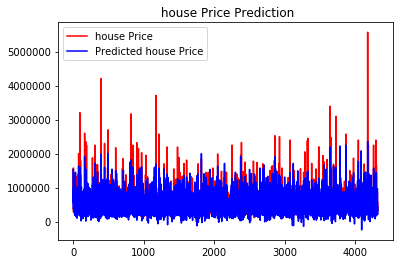

In [75]:
# Visualising the results
housing_predictions_ridge_reg=ridge_reg.predict(X_test)
plt.plot(y_test, color = 'red', label = 'house Price')
plt.plot(housing_predictions_ridge_reg, color = 'blue', label = 'Predicted house Price')
plt.title(' house Price Prediction')

plt.legend()
plt.show()



ok as we can see the model is not predicting very well because the model is too simple,lets try to plot residual(The difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual)


In [76]:
housing_predictions=ridge_reg.predict(X_test)



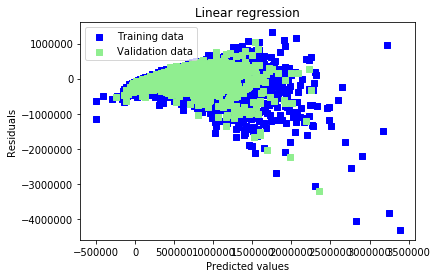

In [77]:
# housing_predictions=ridge_reg.predict(X_test)
housing_predictions_train=ridge_reg.predict(X_train)
plt.scatter(housing_predictions_train, housing_predictions_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(housing_predictions, housing_predictions - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11.5, xmax = 15.5, color = "red")
plt.show()



The residual plot shows a fairly random pattern,This random pattern indicates that a linear model provides a decent fit to the data. As we see here not extacly random that means our data not pure linear


# 8.2 KNeighbors¶

The second model is KNN,here we got accuracy about 78%


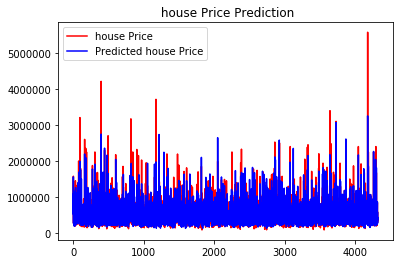

In [78]:
# Visualising the results
housing_predictions_knn_rg=knn_rg.predict(X_test)
plt.plot(y_test, color = 'red', label = 'house Price')
plt.plot(housing_predictions_knn_rg, color = 'blue', label = 'Predicted house Price')
plt.title(' house Price Prediction')

plt.legend()
plt.show()



Well it is better than linear regression, but still this model not predicting very well. For example the prices which as above 5 milion but KNN predict them as 2.5 million


# 8.3 GradientBoostingRegressor

As mentioned, I trained a GBRT ensemble with 120 trees, then measures the validation error at each stage of training to find the optimal number of trees, and finally trains another GBRT ensemble using the optimal number of trees


In [79]:
gbrt_grid_search.best_estimator_



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='ls', max_depth=3, max_features=8,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=119, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

# 8.4 RandomForestRegressor¶

Finally, It seems that Random Forest Model predict very well without overfitting. Because this model consist of ensemble meaning that it contains many decision trees which make it very powerfull.Lets try to plot the actual values and predicted values


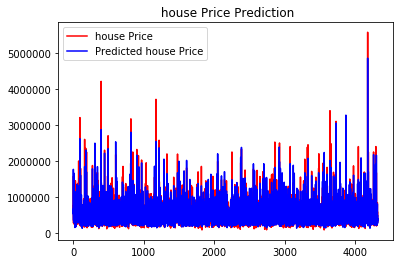

In [80]:
# Visualising the results
housing_predictions_forest_reg_clf=forest_reg_clf.predict(X_test)
plt.plot(y_test, color = 'red', label = 'house Price')
plt.plot(housing_predictions_forest_reg_clf, color = 'blue', label = 'Predicted house Price')
plt.title(' house Price Prediction')

plt.legend()
plt.show()



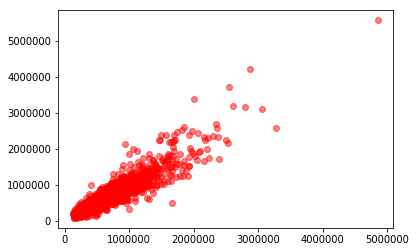

In [81]:
#plotting a scatter plot between the real price  values and predict price  values

plt.scatter(housing_predictions_forest_reg_clf, y_test, c='red', alpha=0.5)
plt.show()



For better evaluation and in order to avoid any overfitting, I have tried Random Forest with Cross Validation and Grid Search


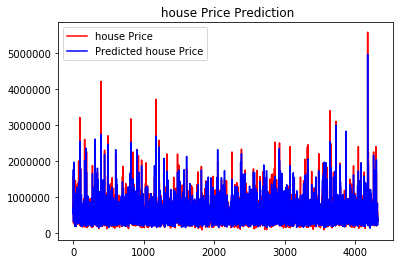

In [82]:
# Visualising the results
housing_predictions_rnd_grid_search=rnd_grid_search.predict(X_test)
plt.plot(y_test, color = 'red', label = 'house Price')
plt.plot(housing_predictions_rnd_grid_search, color = 'blue', label = 'Predicted house Price')
plt.title(' house Price Prediction')

plt.legend()
plt.show()



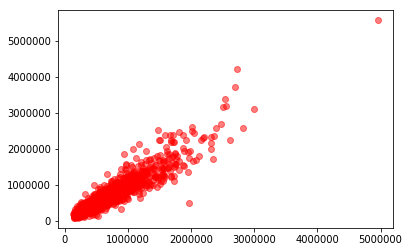

In [83]:
#plotting a scatter plot between the real price  values and predict price  values

plt.scatter(housing_predictions_rnd_grid_search, y_test, c='red', alpha=0.5)
plt.show()



Ok, it seems the pervious model is overfitting, here we can see the best hyperparametes


In [84]:
rnd_grid_search.best_estimator_



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=14, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

# 9. Conclusion






In this work, I tried multiple algorithms such as linear regression with Ridge regularizer and I got performance around 69% which is poor result. Moreover, I tried KNN algorithm, the performance increased to 77%. However. In RandomForestRegressor with best hyperparameters and cross validation, I achieved good improvment when I got accuracy about 89%.
